## Overview

Here you’ll write an algorithm to classify whether images contain either a dog or a cat. This is easy for humans, dogs, and cats. Your computer will find it a bit more difficult.

## The Asirra data set

Web services are often protected with a challenge that’s supposed to be easy for people to solve, but difficult for computers. Such a challenge is often called a CAPTCHA (Completely Automated Public Turing test to tell Computers and Humans Apart) or HIP (Human Interactive Proof). HIPs are used for many purposes, such as to reduce email and blog spam and prevent brute-force attacks on web site passwords.

Asirra (Animal Species Image Recognition for Restricting Access) is a HIP that works by asking users to identify photographs of cats and dogs. This task is difficult for computers, but studies have shown that people can accomplish it quickly and accurately. Many even think it’s fun! Here is an example of the Asirra interface:

Asirra is unique because of its partnership with Petfinder.com, the world’s largest site devoted to finding homes for homeless pets. They’ve provided Microsoft Research with over three million images of cats and dogs, manually classified by people at thousands of animal shelters across the United States. Kaggle is fortunate to offer a subset of this data for fun and research.

## Data Description

The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat).

You can find the dataset [here](https://www.kaggle.com/c/dogs-vs-cats/data).

## Files
* test1.zip
* train.zip

## So let’s begin here…

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img

from PIL import Image
import cv2
from zipfile import ZipFile
import os

Using TensorFlow backend.


## Extracting Files from zip file

In [2]:
file_train = "../input/dogs-vs-cats/train.zip"
file_test = "../input/dogs-vs-cats/test1.zip"

with ZipFile(file_train, 'r') as zip:
    zip.extractall('/train')
    print('Train Extract Done!') 
    
with ZipFile(file_test,'r') as zip:
    zip.extractall('/test1')
    print('Test Extract Done!')

Train Extract Done!
Test Extract Done!


### Number of training data and testing data

In [3]:
print('Train Data ',len(os.listdir('/train/train/')))
print('Test Data ',len(os.listdir('/test1/test1/')))

Train Data  25000
Test Data  12500


### Opening a Train Image

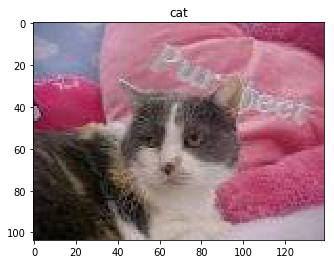

In [4]:
rand_pic = np.random.randint(0,len(os.listdir('/train/train/')))
dc_pic = os.listdir('/train/train/')[rand_pic]

# Load the images
dc_load = Image.open('/train/train/' + dc_pic)
category = dc_pic.split(".")[0]
plt.title(category)
img_plot = plt.imshow(dc_load)

In [5]:
train_path = '/train/train/'

X_train = []
y_train = []

convert = lambda category : int(category == 'dog')

def create_train_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_train.append(new_img_array)
        y_train.append(category)
        
create_train_data(train_path)

X_train = np.array(X_train).reshape(-1, 80,80,1)
y_train = np.array(y_train)
X_train = X_train/255.0

In [6]:
test_path = "/test1/test1/"

X_test = []
test_id = []

def create_test_data(path):
    for p in os.listdir(path):
        test_id.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)

create_test_data(test_path)

X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

## Creating Model

In [7]:
model = Sequential()

model.add(Conv2D(16,(3,3), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

## Fitting Data in Model

In [9]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 100, validation_split=0.3)

Train on 17500 samples, validate on 7500 samples
Epoch 1/20
17500/17500 [==============================] - 7s 407us/step - loss: 0.6633 - accuracy: 0.5865 - val_loss: 0.6072 - val_accuracy: 0.6704
Epoch 2/20
17500/17500 [==============================] - 3s 150us/step - loss: 0.5770 - accuracy: 0.7002 - val_loss: 0.4986 - val_accuracy: 0.7629
Epoch 3/20
17500/17500 [==============================] - 3s 156us/step - loss: 0.5002 - accuracy: 0.7612 - val_loss: 0.4563 - val_accuracy: 0.7897
Epoch 4/20
17500/17500 [==============================] - 3s 161us/step - loss: 0.4428 - accuracy: 0.7931 - val_loss: 0.4029 - val_accuracy: 0.8205
Epoch 5/20
17500/17500 [==============================] - 3s 150us/step - loss: 0.3991 - accuracy: 0.8188 - val_loss: 0.3833 - val_accuracy: 0.8324
Epoch 6/20
17500/17500 [==============================] - 3s 147us/step - loss: 0.3620 - accuracy: 0.8370 - val_loss: 0.3774 - val_accuracy: 0.8368
Epoch 7/20
17500/17500 [==============================] - 3s 14

## Evaluate the model

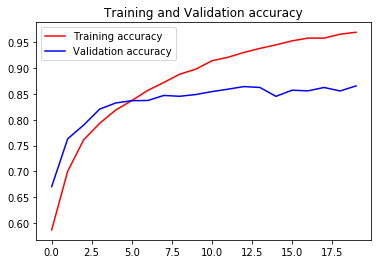

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## Prediction

In [11]:
predictions = model.predict(X_test)
predicted_val = [int(round(p[0])) for p in predictions]

In [12]:
submission_df = pd.DataFrame({'id':test_id, 'label':predicted_val})
submission_df.to_csv("submission.csv", index=False)

## Predicting Test Images

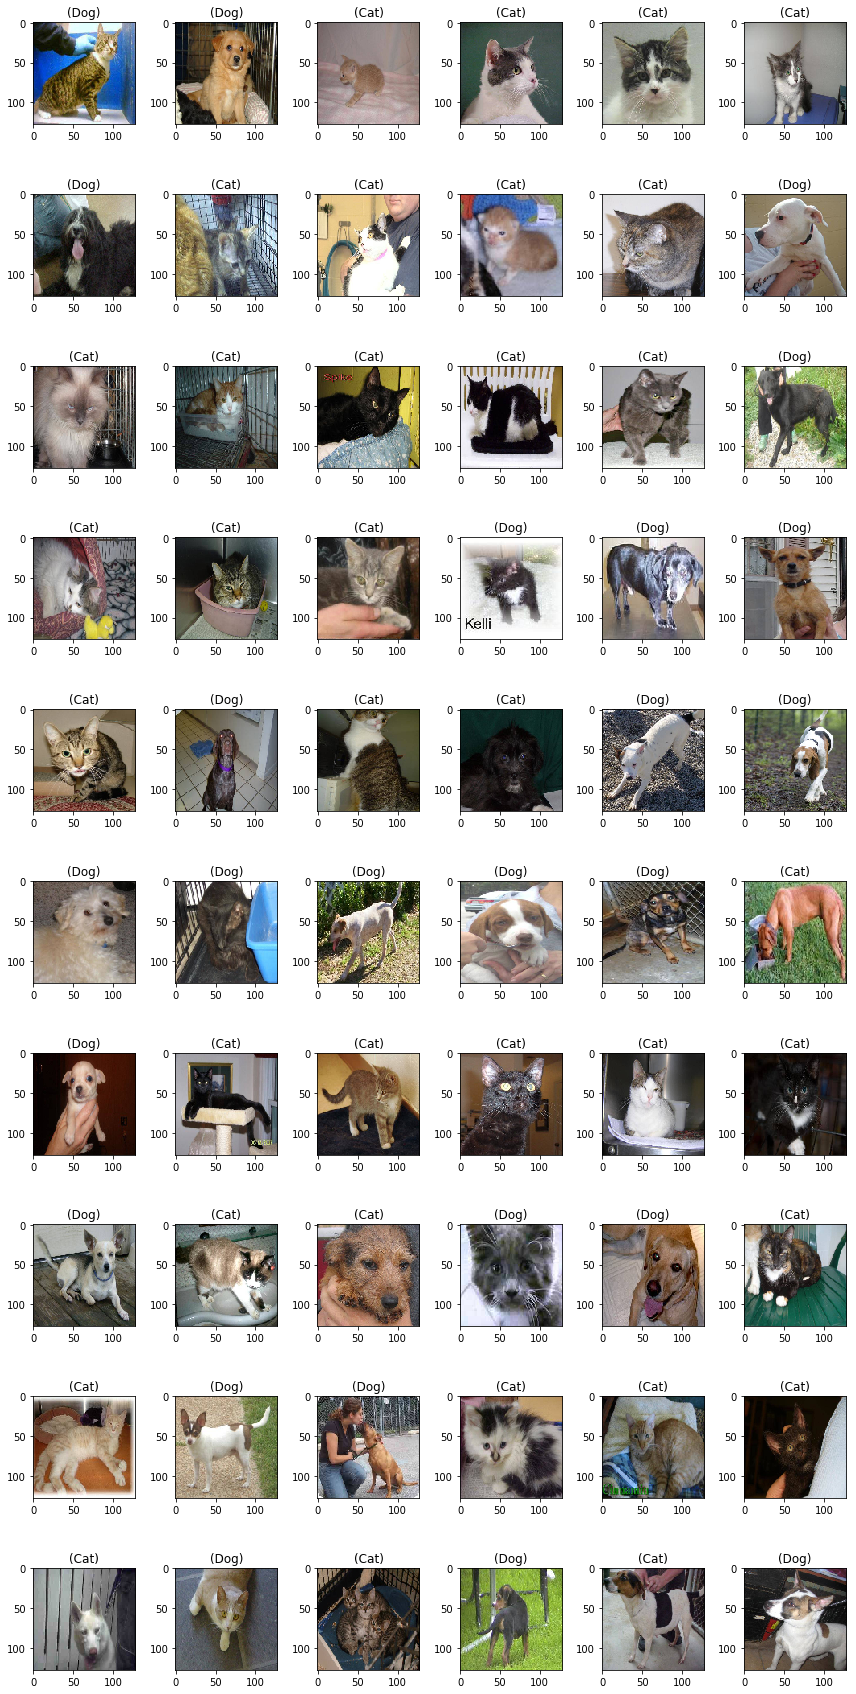

In [13]:
sample_test = submission_df.head(60)
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['id']
    category = row['label']
    img = load_img("/test1/test1/"+filename+".jpg", target_size=(128,128))
    plt.subplot(10, 6, index+1)
    plt.imshow(img)
    if(category == 1):
        plt.title( '(' + "Dog"+ ')' )
    else:
        plt.title( '(' + "Cat"+ ')' )
plt.tight_layout()
plt.show()